In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [74]:
visadf=pd.read_csv('C:/Users/Anuja_PC/OneDrive/Documents/dataFiles/Visadataset.csv')
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box Plot**

- Box plot is used for detect outliers 
- It has min value, q1,q2,q3 and max value.
- Inside box plot the red line represents median which is 50% data
**Outliers**
    - Very very huge or very very small observatuion which pull the data in any side of the distribution
    - For mild outliers - q1-1.5*IQR and q3+1.5*IQR
    - Strong Outliers - q1-3*IQR and q3+3*IQR 
    - IQR - inter quartile range
    - IQR = Q3-Q1
     - q1=25p
     - q2=50p
     - q3=75p

{'whiskers': [<matplotlib.lines.Line2D at 0x1a37dc16510>,
 'caps': [<matplotlib.lines.Line2D at 0x1a37dc185d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a37dc15490>],
 'medians': [<matplotlib.lines.Line2D at 0x1a37dc1a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a37dc1b490>],
 'means': []}

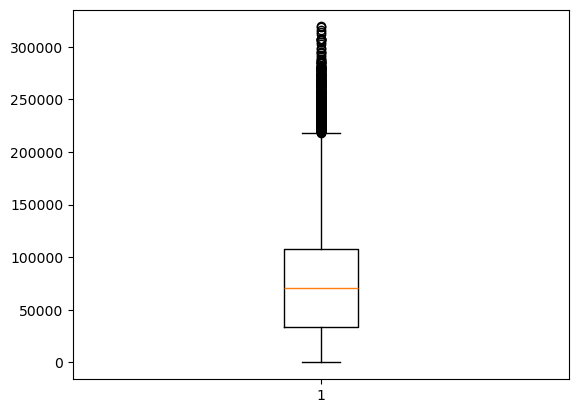

In [75]:
pt.boxplot(data=visadf, x="prevailing_wage")

{'whiskers': [<matplotlib.lines.Line2D at 0x1a37dc8ea50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a37dc907d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a37dc8dc50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a37dc92810>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a37dc93750>],
 'means': []}

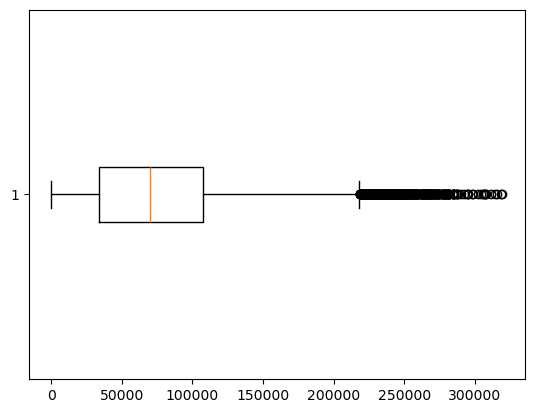

In [76]:
pt.boxplot(visadf["prevailing_wage"],vert=False)


<Axes: >

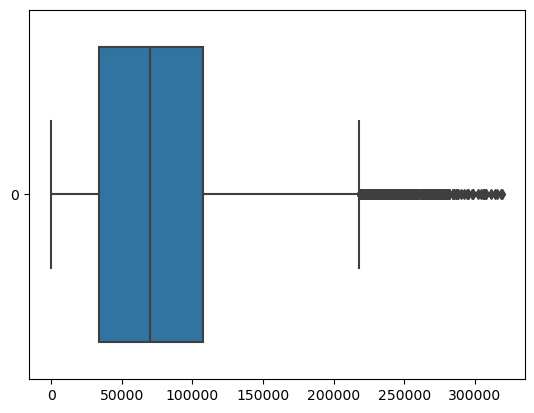

In [42]:
sns.boxplot(visadf["prevailing_wage"],orient='h')

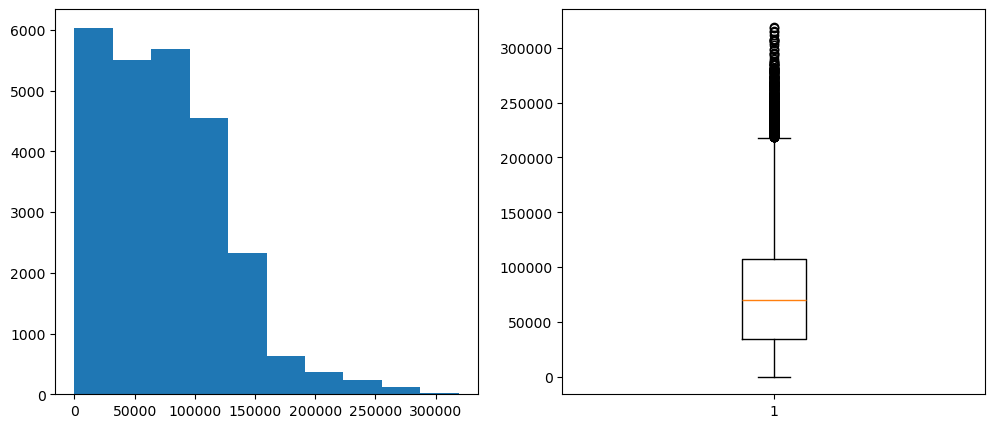

In [77]:
pt.figure(figsize=(12,5))
pt.subplot(1,2,1).hist(visadf["prevailing_wage"])
pt.subplot(1,2,2).boxplot(visadf["prevailing_wage"])
pt.show()


## Finding the outliers ##

- Outliers are availble less tha q1-1.5*IQR
- greater than q3+1.5*IQR

- Step 1
    - calculate q1(25p)
    - calculate q3(75p)
    - calculate IQR : q3-q1

- Step 2
    -LB = q1-1.5*IQR
    -UB = q3+1.5*IQR

- Step - 3
    -cond1 = visadf["prevailing_wage"] < LB
    -cond2 = visadf["prevailing_wage"] > UB
    - apply or operator and get the outliers data


In [78]:
q1=np.quantile(visadf["prevailing_wage"],0.25)
q3=np.quantile(visadf["prevailing_wage"],0.75)

q1,q3

(34015.479999999996, 107735.51250000001)

In [79]:
IQR = q3-q1
IQR

73720.03250000002

In [80]:
LB = q1-1.5*IQR  #lower bound
UB = q3+1.5*IQR  #upper bound

LB,UB

(-76564.56875000002, 218315.56125000003)

In [81]:
cond1 = visadf["prevailing_wage"] < LB
cond2 = visadf["prevailing_wage"] > UB

outliersData=visadf[cond1 | cond2] 
outliersData

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [82]:
cond1 = visadf["prevailing_wage"] > LB
cond2 = visadf["prevailing_wage"] < UB

non_outliersData=visadf[cond1 & cond2]  # non outliers data
non_outliersData


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [83]:
len(non_outliersData)+len(outliersData)  #total

25480

**Histogram and boxplot for non-outiers data**

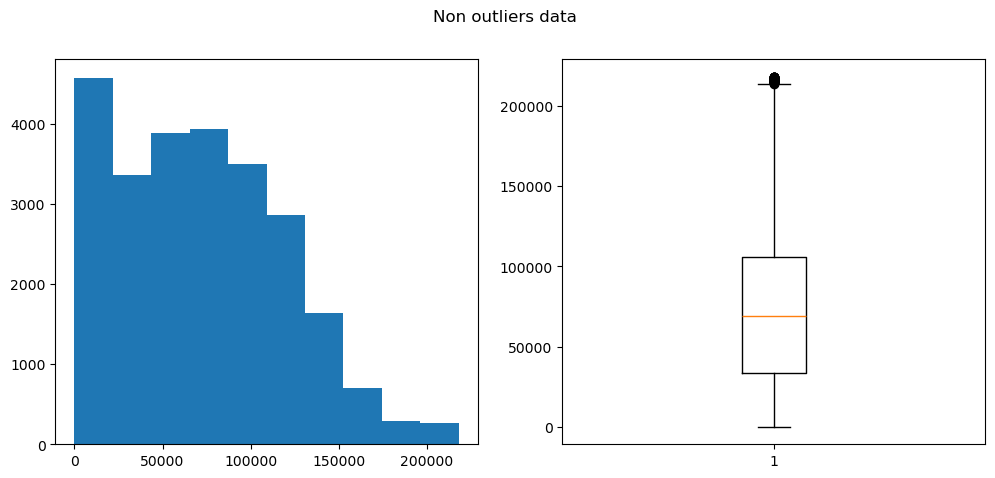

In [56]:
pt.figure(figsize=(12,5))
pt.suptitle("Non outliers data")
pt.subplot(1,2,1).hist(non_outliersData["prevailing_wage"])
pt.subplot(1,2,2).boxplot(non_outliersData["prevailing_wage"])
pt.show()

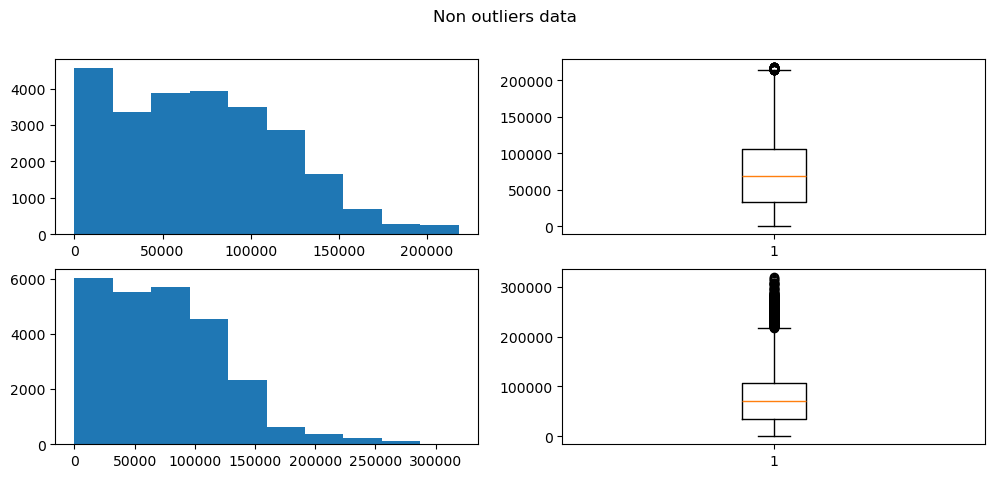

In [84]:
pt.figure(figsize=(12,5))
pt.suptitle("Non outliers data")
pt.subplot(2,2,1).hist(non_outliersData["prevailing_wage"])
pt.subplot(2,2,2).boxplot(non_outliersData["prevailing_wage"])

pt.subplot(2,2,3).hist(visadf["prevailing_wage"])
pt.subplot(2,2,4).boxplot(visadf["prevailing_wage"])
pt.show()

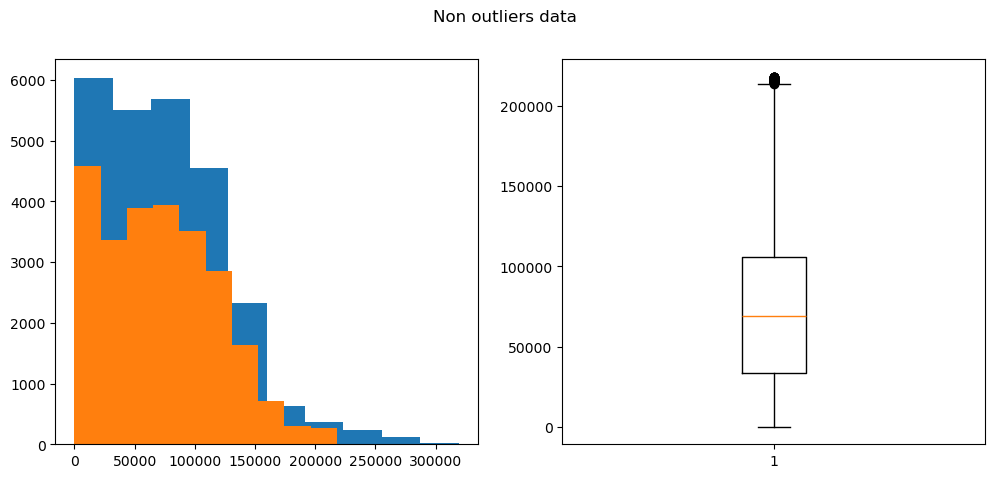

In [67]:
pt.figure(figsize=(12,5))
pt.suptitle("Non outliers data")
pt.subplot(1,2,1).hist(visadf["prevailing_wage"])
pt.subplot(1,2,1).hist(non_outliersData["prevailing_wage"])
pt.subplot(1,2,2).boxplot(non_outliersData["prevailing_wage"])
pt.show()

**How to deal the outliers**

- **Method 1 - drop the outliers**
    - it is not a good idea[data loss, dropping 427 as per above example]
    - x% of 25480=427  , 1.7% 

- **Method 2 - Fill with median value**
    - Outliers does not affect the median, so we can fill outliers by median

- **Method 3 - Cap the values with Q1 and Q3**
    - all less than LB values we can replace with Q1 
    - all greater than UB values we can replace with Q3 

**fill with median**

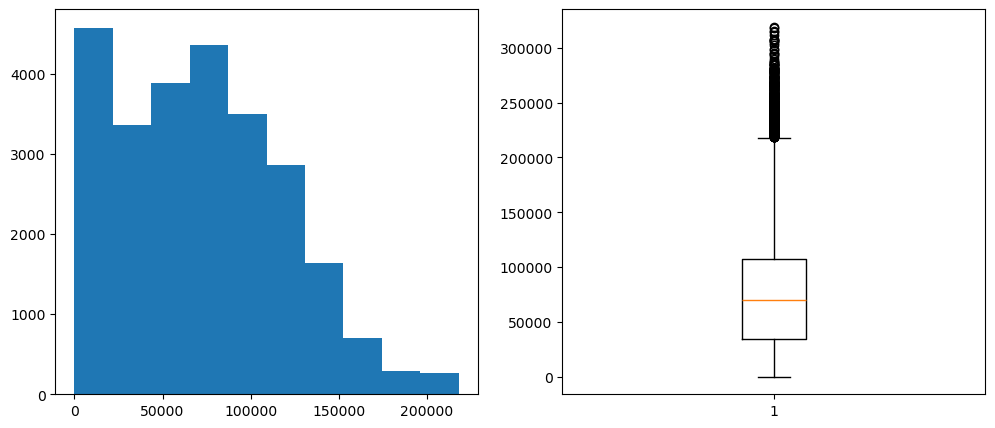

In [107]:
l1= []  #create emply list
mediann=visadf['prevailing_wage'].median() # calculate median
  # iterate through values
for value in visadf['prevailing_wage'].values:
   if value < LB or value > UB:
        l1.append(mediann)
   else:
        l1.append(value)
        
visadf_copy = visadf.copy()
visadf_copy['prevailing_wage'] = l1

pt.figure(figsize=(12,5))
pt.subplot(1,2,1).hist(visadf_copy["prevailing_wage"])
pt.subplot(1,2,2).boxplot(visadf["prevailing_wage"])
pt.show()

In [72]:
d={"sub":["DS","ML","CS"], "Marks":[100,150,20]}

data=pd.DataFrame(d)

con = data['Marks'] > 100
l=np.where(con,1,data['Marks'])
l

array([100,   1,  20], dtype=int64)

In [91]:
LB,UB

(-76564.56875000002, 218315.56125000003)

In [97]:
con1 = visadf['prevailing_wage']< LB 
con2 = visadf['prevailing_wage']>UB
cond = con1 | con2
mediann=visadf['prevailing_wage'].median()
l=np.where(cond,mediann,visadf['prevailing_wage'])
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])